# Data Storytelling - with line chart

In [4]:
import pandas as pd
import duckdb
from constants import GRAY_1, GRAY_2, GRAY_3, BLUE_1

df = pd.read_csv("../02_matplotlib_barline/data/norway_new_car_sales_by_make.csv")
df.head()

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5


In [5]:
df_yearly_quantity = duckdb.query(
    """--sql
    SELECT year, SUM(quantity) as Quantity
    FROM df
    GROUP BY year
    ORDER BY year
"""
).df().set_index("Year").iloc[:-1]
df_yearly_quantity

,Quantity
Year,
2007,129195.0
2008,110617.0
2009,98675.0
2010,127754.0
2011,138345.0
2012,137967.0
2013,142151.0
2014,144202.0
2015,150686.0


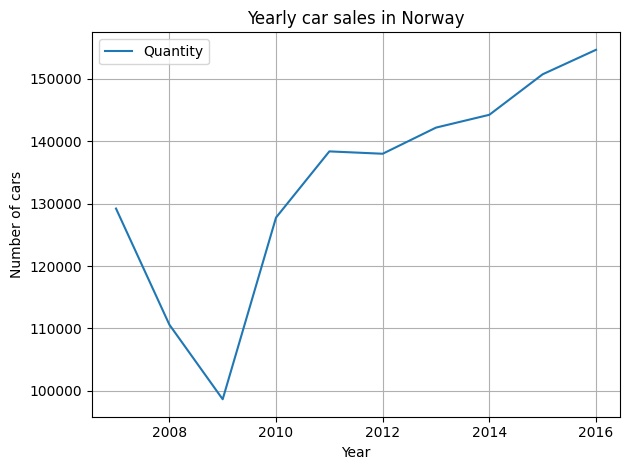

In [67]:
ax = df_yearly_quantity.plot(title="Yearly car sales in Norway", ylabel="Number of cars")
ax.grid()
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/storytelling_line_1")

## How to improve this graph with data storytelling
remove clutter, remove spins, remove grid, thousand delimiter.

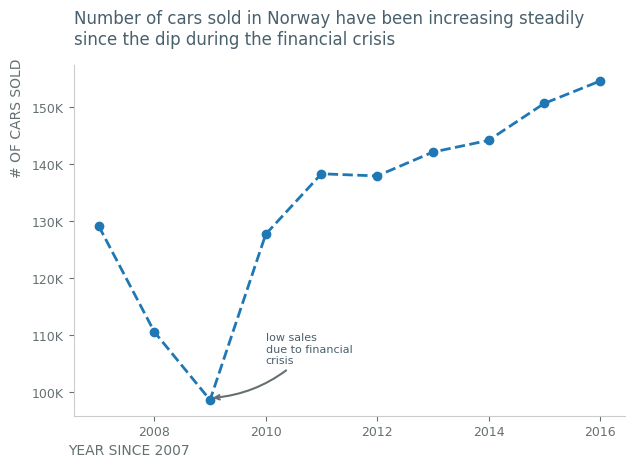

In [66]:
from matplotlib.ticker import FuncFormatter
ax = df_yearly_quantity.plot(
    linewidth= 2,
    style= "--o"
    )
#remove clutter
ax.legend().remove()
ax.spines[["top", "right"]].set_visible(False)
thousand_formatter = FuncFormatter(lambda val, pos: f"{int(val/1000)}K")
ax.yaxis.set_major_formatter(thousand_formatter)

#improve contrast
ax.spines[["left", "bottom"]].set_color(GRAY_1)
ax.tick_params(axis="both", colors=GRAY_2, labelsize=9)

#more descriptive titles and labels
ax.set_title("Number of cars sold in Norway have been increasing steadily \nsince the dip during the financial crisis",
             loc="left",
             color= GRAY_3,
             pad=15
             )
ax.set_xlabel("YEAR SINCE 2007", color= GRAY_2)
ax.set_ylabel("# OF CARS SOLD", color= GRAY_2)

ax.xaxis.set_label_coords(0.1,-0.08)
ax.yaxis.set_label_coords(-0.09,0.85)

arrowprops = dict(arrowstyle ="->", connectionstyle=f"arc3, rad={-.2}", linewidth=1.5, color=GRAY_2)
ax.annotate(text="low sales\ndue to financial\ncrisis", 
            xy=(2009, 99000), 
            fontsize= 8, 
            color= GRAY_3,
            arrowprops=arrowprops,
            xytext= (2010, 105000)
            )

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/storytelling_line_2")